In [62]:
# antes de empezar importamos las librerías que necesitaremos para poder trabajar con todos sus métodos. También configuramos la opción de ver todas las columnas
import numpy as np
import pandas as pd
import re

import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

from scipy.stats import shapiro, kstest, poisson, chisquare, expon
from itertools import combinations



pd.set_option('display.max_columns', None)


In [63]:
df_abc = pd.read_csv("RAW DATA.csv", sep=",", header="infer")
print(df_abc.head())
print(f"Tenemos {df_abc.shape[0]} filas y {df_abc.shape[1]} columnas") 

   Unnamed: 0 Age Attrition BusinessTravel DailyRate  \
0           0  51        No            NaN    684,0$   
1           1  52        No            NaN    699,0$   
2           2  42        No  travel_rarely    532,0$   
3           3  47        No  travel_rarely    359,0$   
4           4  46        No            NaN   1319,0$   

                 Department  DistanceFromHome  Education    EducationField  \
0                       NaN                 6          3               NaN   
1                       NaN                 1          4     Life Sciences   
2   Research & Development                  4          2  Technical Degree   
3                       NaN                 2          4           Medical   
4                       NaN                 3          3  Technical Degree   

   employeecount employeenumber  EnvironmentSatisfaction  Gender HourlyRate  \
0              1          162,0                        1       0         51   
1              1          259,0     

In [64]:
df_abc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1614 entries, 0 to 1613
Data columns (total 42 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1614 non-null   int64  
 1   Age                       1614 non-null   object 
 2   Attrition                 1614 non-null   object 
 3   BusinessTravel            842 non-null    object 
 4   DailyRate                 1614 non-null   object 
 5   Department                302 non-null    object 
 6   DistanceFromHome          1614 non-null   int64  
 7   Education                 1614 non-null   int64  
 8   EducationField            869 non-null    object 
 9   employeecount             1614 non-null   int64  
 10  employeenumber            1183 non-null   object 
 11  EnvironmentSatisfaction   1614 non-null   int64  
 12  Gender                    1614 non-null   int64  
 13  HourlyRate                1614 non-null   object 
 14  JobInvol

In [65]:
df_abc.head(10)

,Unnamed: 0,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,employeecount,employeenumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NUMCOMPANIESWORKED,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TOTALWORKINGYEARS,TrainingTimesLastYear,WORKLIFEBALANCE,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YEARSWITHCURRMANAGER,SameAsMonthlyIncome,DateBirth,Salary,RoleDepartament,NUMBERCHILDREN,RemoteWork
0,0,51,No,NaN,"684,0$",NaN,6,3,NaN,1,"162,0",1,0,51,3,5,resEArch DIREcToR,3,NaN,"19537,0",6462,7,Y,No,13,"3,0",3,NaN,0,NaN,5,"3,0",20,NaN,15,15,"19537,0",1972,1000000000$,NaN,NaN,Yes
1,1,52,No,NaN,"699,0$",NaN,1,4,Life Sciences,1,"259,0",3,0,65,2,5,ManAGeR,3,NaN,"19999,0",5678,0,NaN,NaN,14,"3,0",1,NaN,1,"34,0",5,"3,0",33,NaN,11,9,"19999,0",1971,1000000000$,NaN,NaN,1
2,2,42,No,travel_rarely,"532,0$",Research & Development,4,2,Technical Degree,1,"319,0",3,0,58,3,5,ManaGER,4,Married,"19232,0",4933,1,NaN,No,11,"3,0",4,NaN,0,"22,0",3,NaN,22,NaN,11,15,"19232,0",1981,1000000000$,ManaGER - Research & Development,NaN,1
3,3,47,No,travel_rarely,"359,0$",NaN,2,4,Medical,1,NaN,1,1,82,3,4,ReseArCH DIrECtOr,3,Married,"17169,0",26703,3,Y,NaN,19,"3,0",2,NaN,2,NaN,2,NaN,20,NaN,5,6,"17169,0",1976,1000000000$,NaN,NaN,False
4,4,46,No,NaN,"1319,0$",NaN,3,3,Technical Degree,1,NaN,1,1,45,4,4,sAleS EXECUtIve,1,Divorced,NaN,7739,2,Y,No,12,"3,0",4,NaN,1,NaN,5,"3,0",19,NaN,2,8,NaN,1977,1000000000$,NaN,NaN,0
5,5,48,No,NaN,"117,0$",Research & Development,22,3,Medical,1,"1900,0",4,1,58,3,4,MANAger,4,NaN,"17174,0",2437,3,NaN,No,11,"3,0",2,NaN,1,NaN,3,"3,0",22,NaN,4,7,"17174,0",1975,1000000000$,MANAger - Research & Development,NaN,Yes
6,6,59,No,NaN,"1435,0$",NaN,25,3,Life Sciences,1,"81,0",1,1,99,3,3,Sales ExeCutIVe,1,NaN,NaN,2354,7,Y,NaN,11,"3,0",4,NaN,0,"28,0",3,"2,0",21,NaN,7,9,NaN,1964,1000000000$,NaN,NaN,True
7,7,42,No,travel_rarely,"635,0$",NaN,1,1,NaN,1,"387,0",2,0,99,3,2,Sales eXEcUTiVe,3,Married,NaN,24532,1,NaN,No,25,"4,0",3,NaN,0,"20,0",3,"3,0",20,NaN,11,6,NaN,1981,1000000000$,NaN,NaN,0
8,8,41,No,NaN,"1276,0$",NaN,2,5,NaN,1,NaN,2,1,91,3,4,mANAGEr,1,Married,"16595,0",5626,7,NaN,No,16,"3,0",2,NaN,1,"22,0",2,"3,0",18,NaN,11,8,"16595,0",1982,1000000000$,NaN,NaN,True
9,9,41,No,travel_frequently,"840,0$",NaN,9,3,NaN,1,"999,0",1,0,64,3,5,reSEaRCH DIrectoR,3,NaN,NaN,3735,2,NaN,No,17,"3,0",2,NaN,1,"21,0",2,"4,0",18,NaN,0,11,NaN,1982,1000000000$,NaN,NaN,0


In [66]:
df_abc.columns

Index(['Unnamed: 0', 'Age', 'Attrition', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'employeecount', 'employeenumber', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NUMCOMPANIESWORKED', 'Over18', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TOTALWORKINGYEARS', 'TrainingTimesLastYear',
       'WORKLIFEBALANCE', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YEARSWITHCURRMANAGER',
       'SameAsMonthlyIncome', 'DateBirth', 'Salary', 'RoleDepartament',
       'NUMBERCHILDREN', 'RemoteWork'],
      dtype='object')

In [67]:
# ¿qué valores tenemos en cada columna?
for ind, col in enumerate(df_abc.columns):
    print(ind, "--->", col)
    print(df_abc[col].unique())
    print("---------------------")

0 ---> Unnamed: 0
[   0    1    2 ... 1611 1612 1613]
---------------------
1 ---> Age
['51' '52' '42' '47' '46' '48' '59' '41' '56' '38' '55' '40' '58' '35'
 '45' '33' '36' '34' 'forty-seven' '53' '43' '60' '32' '37' '49' '39' '50'
 '44' '30' 'fifty-eight' '29' '31' '54' '57' '27' 'thirty-six' '28' '26'
 'fifty-five' '25' 'fifty-two' 'thirty-one' '24' 'thirty' '23' '22' '21'
 '20' 'twenty-six' '19' 'thirty-seven' '18' 'thirty-two' 'twenty-four']
---------------------
2 ---> Attrition
['No' 'Yes']
---------------------
3 ---> BusinessTravel
[nan 'travel_rarely' 'travel_frequently' 'non-travel']
---------------------
4 ---> DailyRate
['684,0$' '699,0$' '532,0$' '359,0$' '1319,0$' '117,0$' '1435,0$' '635,0$'
 '1276,0$' '840,0$' '247,0$' '1369,0$' '201,0$' '1360,0$' '692,0$'
 '1398,0$' '286,0$' '1402,0$' '819,0$' '884,0$' '1238,0$' '515,0$'
 '1223,0$' '202,0$' '928,0$' '607,0$' '266,0$' '429,0$' '589,0$' 'nan$'
 '1180,0$' '1282,0$' '776,0$' '665,0$' '526,0$' '1034,0$' '1403,0$'
 '1499,0$'

In [68]:
## Porcentaje de nulos
df_abc.isnull().sum()[df_abc.isnull().sum() > 0]/df_abc.shape[0]*100

BusinessTravel          47.831475
Department              81.288724
EducationField          46.158612
employeenumber          26.703841
MaritalStatus           40.334572
MonthlyIncome           52.230483
Over18                  55.824040
OverTime                41.883519
PerformanceRating       12.081784
StandardHours           74.039653
TOTALWORKINGYEARS       32.589839
WORKLIFEBALANCE          6.691450
YearsInCurrentRole      97.893432
SameAsMonthlyIncome     52.230483
RoleDepartament         81.288724
NUMBERCHILDREN         100.000000
dtype: float64

In [69]:
##Nos llama la atención la columna Salary, confirmamos si tiene un solo dato que se repite
df_abc["Salary"].nunique()

1

In [70]:
## homogeneizar el nombre de las columnas

df_abc.rename(columns = {'Unnamed: 0':"unnamed", 'Age':"age", 'Attrition':"attrition", 'BusinessTravel':"business_travel", 'DailyRate':"daily_rate",
       'Department':"department", 'DistanceFromHome':"distance_from_home", 'Education':"education", 'EducationField':"education_field",
       'employeecount':"employee_count", 'employeenumber':"employee_number", 'EnvironmentSatisfaction':"environment_satisfaction", 'Gender':"gender",
       'HourlyRate':"hourly_rate", 'JobInvolvement':"job_involvement", 'JobLevel':"job_level", 'JobRole':"job_role",
       'JobSatisfaction':"job_satisfaction", 'MaritalStatus':"marital_status", 'MonthlyIncome':"monthly_income", 'MonthlyRate':"monthly_rate",
       'NUMCOMPANIESWORKED':"num_companies_worked", 'Over18':"over_18", 'OverTime':"over_time", 'PercentSalaryHike':"percent_salary_hike",
       'PerformanceRating':"performance_rating", 'RelationshipSatisfaction':"relationship_satisfaction", 'StandardHours':"standard_hours",
       'StockOptionLevel':"stock_option_level", 'TOTALWORKINGYEARS':"total_working_years", 'TrainingTimesLastYear':"training_time_last_year",
       'WORKLIFEBALANCE':"work_life_balance", 'YearsAtCompany':"years_at_company", 'YearsInCurrentRole':"years_in_current_role",
       'YearsSinceLastPromotion':"years_since_last_promotion", 'YEARSWITHCURRMANAGER':"years_with_curr_manager",
       'SameAsMonthlyIncome':"same_as_monthly_income", 'DateBirth':"date_birth", 'Salary':"salary", 'RoleDepartament':"role_department",
       'NUMBERCHILDREN':"number_children", 'RemoteWork':"remote_work"}, inplace=True)

In [71]:
df_abc.columns

Index(['unnamed', 'age', 'attrition', 'business_travel', 'daily_rate',
       'department', 'distance_from_home', 'education', 'education_field',
       'employee_count', 'employee_number', 'environment_satisfaction',
       'gender', 'hourly_rate', 'job_involvement', 'job_level', 'job_role',
       'job_satisfaction', 'marital_status', 'monthly_income', 'monthly_rate',
       'num_companies_worked', 'over_18', 'over_time', 'percent_salary_hike',
       'performance_rating', 'relationship_satisfaction', 'standard_hours',
       'stock_option_level', 'total_working_years', 'training_time_last_year',
       'work_life_balance', 'years_at_company', 'years_in_current_role',
       'years_since_last_promotion', 'years_with_curr_manager',
       'same_as_monthly_income', 'date_birth', 'salary', 'role_department',
       'number_children', 'remote_work'],
      dtype='object')

In [72]:
## Vemos si hay valores duplicados
df_abc.duplicated().sum()

0

In [73]:
# Filtrar filas duplicadas basadas en la columna 'employee_number'
duplicated_rows = df_abc[df_abc.duplicated(subset='employee_number', keep=False)]

# Reemplazar valores nulos por un valor vacío
duplicated_rows_clean = duplicated_rows.fillna('')

# Mostrar una muestra de 56 filas con los valores no nulos
duplicated_rows_clean.sample(56)

,unnamed,age,attrition,business_travel,daily_rate,department,distance_from_home,education,education_field,employee_count,employee_number,environment_satisfaction,gender,hourly_rate,job_involvement,job_level,job_role,job_satisfaction,marital_status,monthly_income,monthly_rate,num_companies_worked,over_18,over_time,percent_salary_hike,performance_rating,relationship_satisfaction,standard_hours,stock_option_level,total_working_years,training_time_last_year,work_life_balance,years_at_company,years_in_current_role,years_since_last_promotion,years_with_curr_manager,same_as_monthly_income,date_birth,salary,role_department,number_children,remote_work
1561,1561,37,No,,"1107,0$",,14,3,,1,,4,1,95,3,1,lAborAtOrY teCHniCiAn,1,,"3034,0",26914,1,,No,12,"3,0",3,,1,,2,"2,0",18,,12,17,"3034,0",1986,1000000000$,,,0
1483,1483,33,No,non-travel,"1038,0$",Sales,8,1,Life Sciences,1,"1044,0",2,1,88,2,1,sales repResENTaTiVE,4,,,21437,0,Y,,19,"3,0",4,,0,,2,"2,0",2,,2,2,,1990,1000000000$,sales repResENTaTiVE - Sales,,0
775,775,26,No,travel_rarely,"572,0$",Sales,10,3,,1,,3,0,46,3,2,saLes ExECutIVE,4,,,9125,1,Y,No,13,"3,0",1,,0,,4,"3,0",5,,1,2,,1997,1000000000$,saLes ExECutIVE - Sales,,False
1567,1567,48,No,travel_rarely,"163,0$",,2,5,,1,"595,0",2,1,37,3,2,sALES EXEcuTIVe,4,Married,"4051,0",19658,2,,No,14,"3,0",1,,1,"14,0",2,"3,0",9,,6,7,"4051,0",1975,1000000000$,,,True
265,265,32,No,,"1005,0$",,2,2,Life Sciences,1,,4,0,79,3,1,laBoratoRY tECHNICiAN,4,,,11864,0,,,13,"3,0",3,"80,0",0,"8,0",2,"2,0",7,,3,6,,1991,1000000000$,,,1
300,300,35,No,,"1315,0$",,22,3,Life Sciences,1,"381,0",2,1,71,4,3,maNagER,2,Divorced,,19100,7,Y,,18,,2,,1,"10,0",6,"2,0",7,,6,2,,1988,1000000000$,,,0
19,19,40,No,travel_rarely,"884,0$",,15,3,Life Sciences,1,,1,1,80,2,3,MAnUFaCtUring dIRecTOr,3,,,25800,1,Y,,13,"3,0",4,,2,"18,0",2,,18,,14,12,,1983,1000000000$,,,True
1527,1527,29,No,,"1283,0$",Research & Development,23,3,,1,"495,0",4,0,54,3,1,ReseaRcH sCientiSt,4,,,18168,9,,No,16,,4,,0,"6,0",4,"3,0",3,,1,2,,1994,1000000000$,ReseaRcH sCientiSt - Research & Development,,Yes
1536,1536,43,No,,"313,0$",,21,3,,1,"525,0",4,0,61,3,1,lABOraTory teCHnIcIAn,4,,"2258,0",15238,7,Y,,20,"4,0",1,"80,0",1,,1,"3,0",3,,1,2,"2258,0",1980,1000000000$,,,1
821,821,59,No,non-travel,"1420,0$",,2,4,Human Resources,1,,3,1,32,2,5,MAnAGER,4,,"18844,0",21922,9,,No,21,"4,0",4,"80,0",1,,3,"3,0",3,,2,2,"18844,0",1964,1000000000$,,,0


In [74]:
columnas_a_eliminar  = ["unnamed", 'number_children', 
                        'years_in_current_role', 'employee_count',"employee_number",'standard_hours', 'salary', 'same_as_monthly_income', 
                        'performance_rating',"over_18", "age"]
df_abc = df_abc.drop(columns=columnas_a_eliminar)
print(df_abc)


     attrition business_travel daily_rate                department  \
0           No             NaN     684,0$                       NaN   
1           No             NaN     699,0$                       NaN   
2           No   travel_rarely     532,0$   Research & Development    
3           No   travel_rarely     359,0$                       NaN   
4           No             NaN    1319,0$                       NaN   
...        ...             ...        ...                       ...   
1609       Yes   travel_rarely     530,0$                       NaN   
1610        No      non-travel     805,0$                       NaN   
1611        No   travel_rarely     903,0$                       NaN   
1612        No      non-travel    1229,0$                       NaN   
1613        No             NaN     566,0$                       NaN   

      distance_from_home  education   education_field  \
0                      6          3               NaN   
1                      1         

In [75]:
df_abc.columns

Index(['attrition', 'business_travel', 'daily_rate', 'department',
       'distance_from_home', 'education', 'education_field',
       'environment_satisfaction', 'gender', 'hourly_rate', 'job_involvement',
       'job_level', 'job_role', 'job_satisfaction', 'marital_status',
       'monthly_income', 'monthly_rate', 'num_companies_worked', 'over_time',
       'percent_salary_hike', 'relationship_satisfaction',
       'stock_option_level', 'total_working_years', 'training_time_last_year',
       'work_life_balance', 'years_at_company', 'years_since_last_promotion',
       'years_with_curr_manager', 'date_birth', 'role_department',
       'remote_work'],
      dtype='object')

In [76]:
## cambiamos las distancias negativas a valor absoluto
df_abc['distance_from_home'] = df_abc['distance_from_home'].abs()

# Verifica los cambios
print((df_abc['distance_from_home']).unique())

[ 6  1  4  2  3 22 25  9  7 23 10 12 14 13 15  8 42 28 37  5 16 35 26 24
 29 17 21 18 30 27 20 31 39 11 19 33 34 46 36 45 47 32 41 49 48 38 43 40
 44]


In [77]:
## confirmamos si ya no tiene valores negativos
print(df_abc["distance_from_home"].unique())

[ 6  1  4  2  3 22 25  9  7 23 10 12 14 13 15  8 42 28 37  5 16 35 26 24
 29 17 21 18 30 27 20 31 39 11 19 33 34 46 36 45 47 32 41 49 48 38 43 40
 44]


In [78]:
## reemplazamos valores en gender: male para 0 y female para 1
df_abc['gender'] = df_abc['gender'].replace({0: 'male', 1: 'female'})
print((df_abc["gender"]).unique())

['male' 'female']


In [79]:
## limpiamos columna daily_rate
df_abc["daily_rate"]

0        684,0$
1        699,0$
2        532,0$
3        359,0$
4       1319,0$
         ...   
1609     530,0$
1610     805,0$
1611     903,0$
1612    1229,0$
1613     566,0$
Name: daily_rate, Length: 1614, dtype: object

In [80]:
#Reemplazamos el simbolo del dolar "$" por un espacio para eliminarlo y asi poder pasar la columna a float
df_abc['daily_rate'] = df_abc['daily_rate'].str.replace('$', '', regex=False)

In [81]:
# Remmplazamos los valores nan, ya que no los detcta como nulos, por 0 para asi poder pasar la columna de object a float
df_abc['daily_rate'] = df_abc['daily_rate'].str.replace('nan', '0', regex=False)

In [82]:
df_abc['daily_rate'] = df_abc['daily_rate'].str.replace(',', '.', regex=False)
df_abc['daily_rate']

0        684.0
1        699.0
2        532.0
3        359.0
4       1319.0
         ...  
1609     530.0
1610     805.0
1611     903.0
1612    1229.0
1613     566.0
Name: daily_rate, Length: 1614, dtype: object

In [83]:
# Pasamos la columna de object a float, y lo comprobamos.
df_abc['daily_rate'] = pd.to_numeric(df_abc['daily_rate'])
df_abc['daily_rate'].dtype

dtype('float64')

In [84]:
#Comprobamos la cantidad de 0, y en relación a la cantidad de datos 124, es decir 7,68%
cantidad_zeros = (df_abc['daily_rate'] == 0).sum()
cantidad_zeros

124

In [85]:
nulos = df_abc['daily_rate'].isnull().sum()
nulos

0

In [86]:
#Comprobamos que no tiene valores 
tiene_negativos = (df_abc['daily_rate'] < 0).any()
tiene_negativos

False

In [87]:
#Comprobamos que está todo correcto
df_abc['daily_rate']

0        684.0
1        699.0
2        532.0
3        359.0
4       1319.0
         ...  
1609     530.0
1610     805.0
1611     903.0
1612    1229.0
1613     566.0
Name: daily_rate, Length: 1614, dtype: float64

In [88]:
df_abc.columns

Index(['attrition', 'business_travel', 'daily_rate', 'department',
       'distance_from_home', 'education', 'education_field',
       'environment_satisfaction', 'gender', 'hourly_rate', 'job_involvement',
       'job_level', 'job_role', 'job_satisfaction', 'marital_status',
       'monthly_income', 'monthly_rate', 'num_companies_worked', 'over_time',
       'percent_salary_hike', 'relationship_satisfaction',
       'stock_option_level', 'total_working_years', 'training_time_last_year',
       'work_life_balance', 'years_at_company', 'years_since_last_promotion',
       'years_with_curr_manager', 'date_birth', 'role_department',
       'remote_work'],
      dtype='object')

In [89]:
df_abc['total_working_years']

0        NaN
1       34,0
2       22,0
3        NaN
4        NaN
        ... 
1609     NaN
1610     NaN
1611     9,0
1612    12,0
1613     NaN
Name: total_working_years, Length: 1614, dtype: object

In [90]:
# Cambiar nulos por cero ya que entendemos que los Nan son personas que tienen menos de un año de experiencia
df_abc['total_working_years'] = df_abc['total_working_years'].fillna("0")

In [91]:
df_abc['total_working_years'] = df_abc['total_working_years'].str.replace(',', '.', regex=False)

In [92]:
df_abc['total_working_years']

0          0
1       34.0
2       22.0
3          0
4          0
        ... 
1609       0
1610       0
1611     9.0
1612    12.0
1613       0
Name: total_working_years, Length: 1614, dtype: object

In [93]:
# Cambiamos el tipo de columna de object a float
df_abc['total_working_years'] = pd.to_numeric(df_abc['total_working_years'])
df_abc['total_working_years'].dtype

dtype('float64')

Nicole

In [94]:
## recordamos que education field tiene 46% de nulos


In [95]:
# corregir los errores tipograficos usando replace
# Normalizar los valores
df_abc['marital_status'] = df_abc['marital_status'].str.strip().str.capitalize()

# Reemplazar errores tipográficos
df_abc['marital_status'] = df_abc['marital_status'].replace({
    'Marreid': 'Married',
    'divorced': 'Divorced',})

In [96]:
# Compruebo los valores 
df_abc['marital_status'].value_counts()

marital_status
Married     439
Single      325
Divorced    199
Name: count, dtype: int64

In [97]:
# "age" "date_birth" son dos columnas coincidentes El valor mas pequeños 1963 (60) y el valor mas alto 2005(18)

In [98]:
# columna "remote_work"
# creo que es mejor crear una columna con los valores booleanos y convertirlos
# defino los valores que serán verdaderos
valores_verdaderos = ['True', 'Yes', 'true', 'yes', 1]

# se crea una columna booleana se pasa a minuscula
df_abc['remote_work'] = df_abc['remote_work'].str.lower().isin(valores_verdaderos)

#contamos los valores True y False en la columna nueva
print(df_abc['remote_work'].value_counts())

remote_work
False    974
True     640
Name: count, dtype: int64


In [99]:

df_abc['over_time'].fillna('unknown', inplace=True)
df_abc["over_time"].sample(10)

C:\Users\trico\AppData\Local\Temp\ipykernel_31204\3835953267.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_abc['over_time'].fillna('unknown', inplace=True)


112          No
883          No
1569        Yes
1012         No
36      unknown
996          No
832     unknown
639     unknown
123     unknown
22      unknown
Name: over_time, dtype: object

In [100]:
# Como he estado haciendo pruebas y me daba error cambio estrategia verifico tipo
print(df_abc['work_life_balance'].dtype)

# Reemplazar comas por puntos en la columna
df_abc['work_life_balance'] = df_abc['work_life_balance'].str.replace(',', '.', regex=False)

# Convertir la columna a float, imputar valores nulos con la moda (dato que más se repite = 3)
df_abc['work_life_balance'] = pd.to_numeric(df_abc['work_life_balance'], errors='coerce')
df_abc['work_life_balance'].fillna(3, inplace=True)
df_abc['work_life_balance'] = df_abc['work_life_balance'].astype(int)

# Verificar los valores únicos y el conteo
print(df_abc['work_life_balance'].unique())
print(df_abc['work_life_balance'].value_counts())


object
[3 2 4 1]
work_life_balance
3    1021
2     359
4     155
1      79
Name: count, dtype: int64


C:\Users\trico\AppData\Local\Temp\ipykernel_31204\202632753.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_abc['work_life_balance'].fillna(3, inplace=True)


In [101]:
# Siguiendo lo que hemos hablado con el cliente 
# vamos a remplazar los valores nulos de la columna job_role por "unknown"
df_abc['job_role'].fillna('unknown', inplace=True)
df_abc['role_department'].fillna('unknown', inplace=True)

C:\Users\trico\AppData\Local\Temp\ipykernel_31204\1292019881.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_abc['job_role'].fillna('unknown', inplace=True)
C:\Users\trico\AppData\Local\Temp\ipykernel_31204\1292019881.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

In [102]:
# Corregir el texto (quitar espacios, minúsculas,mayusculas)
df_abc['job_role'] = df_abc['job_role'].str.strip().str.lower().str.title()
df_abc['role_department'] = df_abc['role_department'].str.strip().str.lower().str.title()
df_abc['department'] = df_abc['department'].str.strip().str.lower().str.title()

In [103]:
# separo "role_department" en "role" y "department"
# separo "role_department" en "role" y "department"
df_abc[['role', 'department_1']] = df_abc['role_department'].str.split('-', expand=True)

# separo "role_department" en "role" y "department"


In [104]:
# compruebo resultados
print(df_abc['job_role'].unique())
print(df_abc['role'].unique())
print(df_abc['department'].unique())

['Research Director' 'Manager' 'Sales Executive' 'Manufacturing Director'
 'Research Scientist' 'Healthcare Representative' 'Laboratory Technician'
 'Sales Representative' 'Human Resources']
['Unknown' 'Manager  ' 'Healthcare Representative  ' 'Sales Executive  '
 'Laboratory Technician  ' 'Manufacturing Director  '
 'Research Scientist  ' 'Research Director  ' 'Human Resources  '
 'Sales Representative  ']
[nan 'Research & Development' 'Sales' 'Human Resources']


In [105]:
df_abc[["job_role", "role", "department","department_1"]].sample(30)

,job_role,role,department,department_1
747,Laboratory Technician,Unknown,NaN,None
874,Research Scientist,Unknown,NaN,None
1554,Sales Executive,Sales Executive,Sales,Sales
836,Laboratory Technician,Unknown,NaN,None
1146,Sales Executive,Unknown,NaN,None
279,Sales Executive,Unknown,NaN,None
1493,Healthcare Representative,Unknown,NaN,None
1043,Sales Executive,Unknown,NaN,None
1504,Sales Executive,Unknown,NaN,None
585,Sales Executive,Unknown,NaN,None


In [106]:
df_abc[["job_role", "role", "department","department_1"]].sample(30)

,job_role,role,department,department_1
758,Manufacturing Director,Unknown,NaN,None
1170,Research Scientist,Unknown,NaN,None
202,Laboratory Technician,Unknown,NaN,None
387,Manufacturing Director,Unknown,NaN,None
98,Manager,Unknown,NaN,None
714,Research Director,Research Director,Research & Development,Research & Development
97,Research Scientist,Unknown,NaN,None
1409,Laboratory Technician,Unknown,NaN,None
760,Laboratory Technician,Unknown,NaN,None
1504,Sales Executive,Unknown,NaN,None


In [107]:
## Eliminamos columnas duplicadas de job role y de department, nos quedamos con la que tiene más info
columnas_a_eliminar_job  = ["role", 'department']
df_abc = df_abc.drop(columns=columnas_a_eliminar_job)
print(df_abc)

     attrition business_travel  daily_rate  distance_from_home  education  \
0           No             NaN       684.0                   6          3   
1           No             NaN       699.0                   1          4   
2           No   travel_rarely       532.0                   4          2   
3           No   travel_rarely       359.0                   2          4   
4           No             NaN      1319.0                   3          3   
...        ...             ...         ...                 ...        ...   
1609       Yes   travel_rarely       530.0                   3          1   
1610        No      non-travel       805.0                   4          2   
1611        No   travel_rarely       903.0                  13          5   
1612        No      non-travel      1229.0                   8          4   
1613        No             NaN       566.0                   7          2   

       education_field  environment_satisfaction  gender hourly_rate  \
0  

In [108]:
df_abc.rename(columns={'department_1': 'department'}, inplace=True)

In [109]:
df_abc.columns

Index(['attrition', 'business_travel', 'daily_rate', 'distance_from_home',
       'education', 'education_field', 'environment_satisfaction', 'gender',
       'hourly_rate', 'job_involvement', 'job_level', 'job_role',
       'job_satisfaction', 'marital_status', 'monthly_income', 'monthly_rate',
       'num_companies_worked', 'over_time', 'percent_salary_hike',
       'relationship_satisfaction', 'stock_option_level',
       'total_working_years', 'training_time_last_year', 'work_life_balance',
       'years_at_company', 'years_since_last_promotion',
       'years_with_curr_manager', 'date_birth', 'role_department',
       'remote_work', 'department'],
      dtype='object')

In [110]:
# MODIFICAR COLUMNA education_field
df_abc[["education_field"]]

,education_field
0,NaN
1,Life Sciences
2,Technical Degree
3,Medical
4,Technical Degree
...,...
1609,Life Sciences
1610,NaN
1611,NaN
1612,Technical Degree


In [111]:
df_abc['education_field'].fillna('Other', inplace=True)
df_abc["education_field"].sample(10)

C:\Users\trico\AppData\Local\Temp\ipykernel_31204\2126376215.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_abc['education_field'].fillna('Other', inplace=True)


1089            Other
1294            Other
40              Other
844     Life Sciences
1242    Life Sciences
604           Medical
243         Marketing
1256            Other
21      Life Sciences
797             Other
Name: education_field, dtype: object

In [112]:
df_abc['education_field'].value_counts()

education_field
Other               804
Life Sciences       349
Medical             276
Marketing           104
Technical Degree     69
Human Resources      12
Name: count, dtype: int64

In [113]:
#Modidicar columna bussines travel 

df_abc[["business_travel"]]

,business_travel
0,NaN
1,NaN
2,travel_rarely
3,travel_rarely
4,NaN
...,...
1609,travel_rarely
1610,non-travel
1611,travel_rarely
1612,non-travel


In [114]:
df_abc['business_travel'].isnull().sum()

772

In [115]:
# non-travel. Entendemos que los valores nulos implican que no viajan.

df_abc['business_travel'].fillna('non-travel', inplace=True)
df_abc["business_travel"].sample(10)    

C:\Users\trico\AppData\Local\Temp\ipykernel_31204\3757312833.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_abc['business_travel'].fillna('non-travel', inplace=True)


785     travel_frequently
259         travel_rarely
1408        travel_rarely
769            non-travel
18             non-travel
1375           non-travel
178         travel_rarely
1400    travel_frequently
24          travel_rarely
481         travel_rarely
Name: business_travel, dtype: object

In [116]:
df_abc['business_travel'].value_counts()

business_travel
non-travel           863
travel_rarely        586
travel_frequently    165
Name: count, dtype: int64

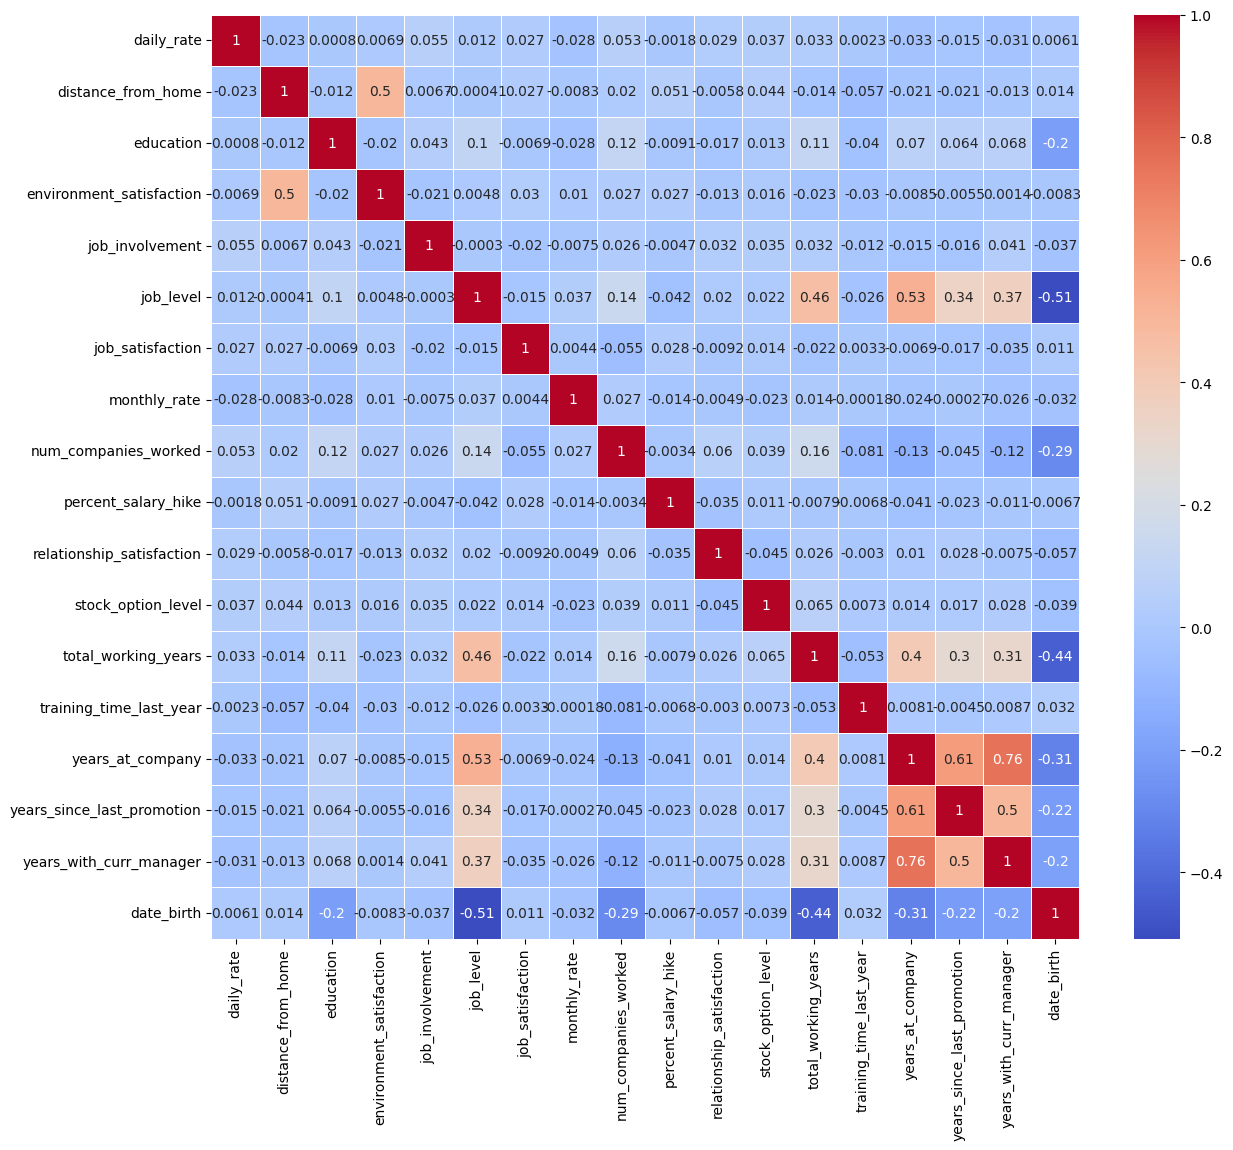

In [117]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de correlación entre las columnas numéricas del DataFrame
correlation_matrix = df_abc.select_dtypes(include=['float64', 'int64']).corr()

# Crear el heatmap usando seaborn
plt.figure(figsize=(14, 12))  # Ajustar el tamaño del gráfico si es necesario
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Mostrar el gráfico
plt.show()

In [118]:
df_abc['employee_id'] = range(1, len(df_abc) + 1)
df_abc.set_index('employee_id', inplace=True)

df_abc.index.name = 'employee_id'

In [119]:
df_abc.head(10)

,attrition,business_travel,daily_rate,distance_from_home,education,education_field,environment_satisfaction,gender,hourly_rate,job_involvement,job_level,job_role,job_satisfaction,marital_status,monthly_income,monthly_rate,num_companies_worked,over_time,percent_salary_hike,relationship_satisfaction,stock_option_level,total_working_years,training_time_last_year,work_life_balance,years_at_company,years_since_last_promotion,years_with_curr_manager,date_birth,role_department,remote_work,department
employee_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,No,non-travel,684.0,6,3,Other,1,male,51,3,5,Research Director,3,NaN,"19537,0",6462,7,No,13,3,0,0.0,5,3,20,15,15,1972,Unknown,True,None
2,No,non-travel,699.0,1,4,Life Sciences,3,male,65,2,5,Manager,3,NaN,"19999,0",5678,0,unknown,14,1,1,34.0,5,3,33,11,9,1971,Unknown,False,None
3,No,travel_rarely,532.0,4,2,Technical Degree,3,male,58,3,5,Manager,4,Married,"19232,0",4933,1,No,11,4,0,22.0,3,3,22,11,15,1981,Manager - Research & Development,False,Research & Development
4,No,travel_rarely,359.0,2,4,Medical,1,female,82,3,4,Research Director,3,Married,"17169,0",26703,3,unknown,19,2,2,0.0,2,3,20,5,6,1976,Unknown,False,None
5,No,non-travel,1319.0,3,3,Technical Degree,1,female,45,4,4,Sales Executive,1,Divorced,NaN,7739,2,No,12,4,1,0.0,5,3,19,2,8,1977,Unknown,False,None
6,No,non-travel,117.0,22,3,Medical,4,female,58,3,4,Manager,4,NaN,"17174,0",2437,3,No,11,2,1,0.0,3,3,22,4,7,1975,Manager - Research & Development,True,Research & Development
7,No,non-travel,1435.0,25,3,Life Sciences,1,female,99,3,3,Sales Executive,1,NaN,NaN,2354,7,unknown,11,4,0,28.0,3,2,21,7,9,1964,Unknown,True,None
8,No,travel_rarely,635.0,1,1,Other,2,male,99,3,2,Sales Executive,3,Married,NaN,24532,1,No,25,3,0,20.0,3,3,20,11,6,1981,Unknown,False,None
9,No,non-travel,1276.0,2,5,Other,2,female,91,3,4,Manager,1,Married,"16595,0",5626,7,No,16,2,1,22.0,2,3,18,11,8,1982,Unknown,True,None


In [120]:
df_abc.to_csv("df_abc", index=True)

In [121]:
df_abc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1614 entries, 1 to 1614
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   attrition                   1614 non-null   object 
 1   business_travel             1614 non-null   object 
 2   daily_rate                  1614 non-null   float64
 3   distance_from_home          1614 non-null   int64  
 4   education                   1614 non-null   int64  
 5   education_field             1614 non-null   object 
 6   environment_satisfaction    1614 non-null   int64  
 7   gender                      1614 non-null   object 
 8   hourly_rate                 1614 non-null   object 
 9   job_involvement             1614 non-null   int64  
 10  job_level                   1614 non-null   int64  
 11  job_role                    1614 non-null   object 
 12  job_satisfaction            1614 non-null   int64  
 13  marital_status              963 non-nu